In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-startup-funding/startup_funding.csv


In [2]:
df = pd.read_csv('/kaggle/input/indian-startup-funding/startup_funding.csv')

In [3]:
df.head(10)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
5,6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN
6,7,10/01/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",NaN
7,8,12/12/2019,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",NaN
8,9,06/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN
9,10,03/12/2019,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [5]:
df.drop(columns=['Remarks'],inplace=True)
# since this column has only 419 non-null values compared to 2625 null hence only about 15% data so we'll drop the column .

In [6]:
df.set_index('Sr No',inplace=True)

In [7]:
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [8]:
df.rename(columns={
    'Date dd/mm/yyyy':'date',
    'Startup Name':'startup',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'Investors Name':'investors',
    'InvestmentnType':'round',
    'Amount in USD':'amount'    
    
},inplace=True)

In [9]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [10]:
df['amount'] = df['amount'].fillna('0')
# since we want amount in rupees so replacing null to 0 .

In [11]:
df['amount'] = df['amount'].str.replace(',','')
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')

In [12]:
df = df[df['amount'].str.isdigit()]

In [13]:
df['amount'] = df['amount'].astype('float')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3029 non-null   object 
 1   startup      3029 non-null   object 
 2   vertical     2858 non-null   object 
 3   subvertical  2104 non-null   object 
 4   city         2849 non-null   object 
 5   investors    3005 non-null   object 
 6   round        3027 non-null   object 
 7   amount       3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [15]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [16]:
def to_inr(dollar):
    inr = dollar * 88.5
    return inr/10000000

In [17]:
df['amount'] = df['amount'].apply(to_inr)
# converting dollar to inr

In [18]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1770.000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,71.228287
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,162.475911
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,26.550000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.930000


In [19]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')
# since many dates have issue in format so skip those rows for now

In [20]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1770.000000
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,71.228287
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,162.475911
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,26.550000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.930000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1283 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3005 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [22]:
df = df.dropna(subset=['date','startup','vertical','city','investors','round','amount'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1202 entries, 1 to 2829
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1202 non-null   datetime64[ns]
 1   startup      1202 non-null   object        
 2   vertical     1202 non-null   object        
 3   subvertical  890 non-null    object        
 4   city         1202 non-null   object        
 5   investors    1202 non-null   object        
 6   round        1202 non-null   object        
 7   amount       1202 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 84.5+ KB


- so now only subvertical column has null values

In [24]:
df.to_csv('startup_cleaned.csv',index=False)

In [25]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1770.000000
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,162.475911
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,26.550000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.930000
7,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1327.500000


In [26]:
sorted(set(df['investors'].str.split(',').sum()))
# now we have split the name of investors for each startup and also removed duplicates . 

['',
 ' & Others',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 91springboard',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhinav Patodia',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Accel India',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners and G Raghunandan',
 ' Accel Partners and IDG Ventures',
 ' Accel Partners and Saama Capital',
 ' Accion',
 ' Adam D\\\\xe2\\\\x80\\\\x99Angelo',
 ' Aditya Agarwal',
 ' Aditya Aggarwal',
 ' Aditya Malik & Others',
 ' Aditya Vazirani',
 ' AdvantEdge Partners',
 ' Adveq Management',
 ' Aijaz Saleem',
 ' Ajay Bhatia',
 ' Ajeet Khurana & others',
 ' Akatsuki and Incubate Fund from Japan and Better Capital AngelList syndicate.',
 ' Alfa Capital',
 ' Alok Divatia',
 ' Alok Mittal',
 ' Alok Sharma',
 ' Aloke Bajp

In [27]:
df[df['investors'].str.contains(' IDG Ventures')].head()[['date','startup','vertical','city','round','amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
259,2018-02-05,Bizongo,Consumer Internet,Mumbai,Private Equity,194.700
528,2017-05-10,Little Black Book,Consumer Internet,New Delhi,Private Equity,8.850
1506,2016-04-07,Curefit,Consumer Internet,Bangalore,Private Equity,132.750
1673,2016-04-05,Lenskart,eCommerce,New Delhi,Private Equity,531.000
1933,2016-08-02,Xpressbees,ECommerce,Pune,Private Equity,110.625


In [28]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Lenskart                 531.000
Bizongo                  194.700
Curefit                  132.750
Xpressbees               110.625
FirstCry.com              88.500
Cloudcherry Analytics      8.850
Little Black Book          8.850
Tripoto                    0.000
Name: amount, dtype: float64

<Axes: ylabel='amount'>

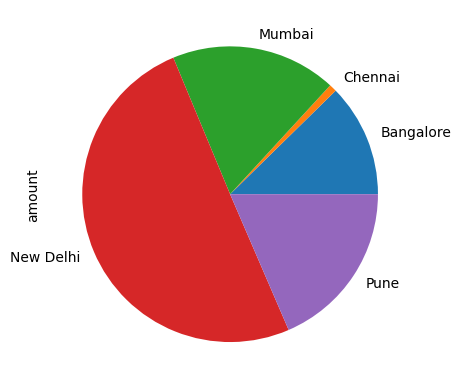

In [29]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('city')['amount'].sum().plot(kind='pie')

In [30]:
df['year'] = df['date'].dt.year

In [31]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1770.000000,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,162.475911,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,26.550000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.930000,2020
7,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1327.500000,2020


<Axes: xlabel='year'>

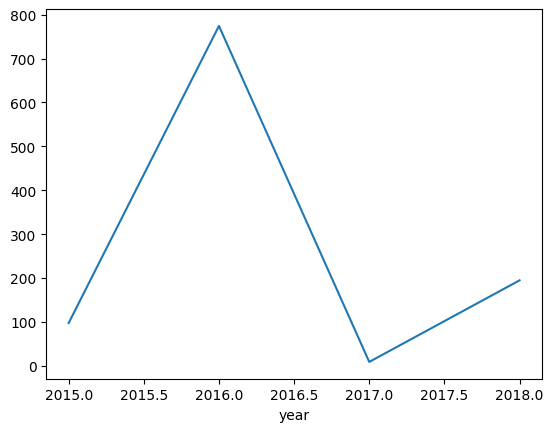

In [32]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('year')['amount'].sum().plot()

In [33]:
round(df['amount'].max())

22125

In [34]:
df[df['amount'] == 32175]

,date,startup,vertical,subvertical,city,investors,round,amount,year
Sr No,,,,,,,,,


In [35]:
df['startup'].nunique()

1081

In [36]:
df['month'] = df['date'].dt.month

In [37]:
df

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1770.000000,2020,9
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,162.475911,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,26.550000,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.930000,2020,2
7,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1327.500000,2020,10
...,...,...,...,...,...,...,...,...,...,...
2825,2015-09-04,Urban Ladder,Online Furnishing\\neCommerce,NaN,Bangalore,"Sequoia Capital, TR Capital, Steadview Capital...",Private Equity,442.500000,2015,9
2826,2015-09-04,Purple Squirrel,Ed-Tech,NaN,Mumbai,"Matrix Partners India, India Quotient",Private Equity,0.000000,2015,9
2827,2015-10-04,Whatfix,Interactive\\xc2\\xa0 How-To Guides,NaN,Bangalore,"Helion Venture Partner, Powerhouse Ventures, G...",Seed Funding,7.965000,2015,10


In [38]:
df.groupby(['year','month'])['startup'].count().reset_index()

,year,month,startup
0,2015,1,35
1,2015,2,14
2,2015,3,36
3,2015,4,21
4,2015,5,22
...,...,...,...
57,2019,11,5
58,2019,12,5
59,2020,2,2
60,2020,9,2


In [39]:
temp_df = df.groupby(['year','month'])['amount'].sum().reset_index()

In [40]:
temp_df['x_axis'] = temp_df['month'].astype('str') + '-' + temp_df['year'].astype('str')

In [41]:
temp_df[['amount','x_axis']]

,amount,x_axis
0,5658.247500,1-2015
1,1681.154850,2-2015
2,2049.615750,3-2015
3,2077.493250,4-2015
4,877.344750,5-2015
...,...,...
57,1237.230000,11-2019
58,1323.075000,12-2019
59,42.480000,2-2020
60,1932.475911,9-2020
